<a href="https://colab.research.google.com/github/SoremiKayode/COMP5000-2022-labs/blob/main/Spam_Ham_Email_Classification_Using_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Spam/Ham Email Classification Using Logistic Regression**

**Author:** Soremi Kayode
**Date:** March 15, 2025  
**GitHub:  [https://github.com/SoremiKayode/COMP5000-2022-labs/blob/main/Spam_Ham_Email_Classification_Using_Logistic_Regression.ipynb ](https://)

## Project Overview
This project demonstrates a logistic regression model to classify emails as **spam** (1) or **ham** (0) with **98% accuracy**. Using a dataset of labeled emails, we preprocess text data with TF-IDF vectorization, train a logistic regression model, and evaluate its performance with accuracy, precision, recall, F1-score, and a confusion matrix. Visualizations are included to enhance interpretability.

## Objectives
- Build a predictive model for email spam detection.
- Achieve high accuracy using logistic regression.
- Provide clear documentation and visualizations for portfolio purposes.

## Dataset
The dataset (`spam_ham_dataset.csv`) contains email text and labels:  
- `text`: Email content  
- `label_num`: 0 (ham) or 1 (spam)  

## 1. Import Libraries
We start by importing essential Python libraries for data manipulation, modeling, and visualization.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 2. Load and Explore the Dataset
Load the dataset and inspect its structure.

In [4]:
# Load dataset
SH = pd.read_csv('spam_ham_dataset.csv')

# Display first few rows
SH.head()

# Basic info
print('Dataset Info:')
print(SH.info())

# Label distribution
print('\nLabel Distribution:')
print(SH['label_num'].value_counts(normalize=True))

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB
None

Label Distribution:
label_num
0    0.710114
1    0.289886
Name: proportion, dtype: float64


## 3. Data Preprocessing
Convert raw email text into numerical features using TF-IDF (Term Frequency-Inverse Document Frequency) vectorization.

In [5]:
# Define features (X) and target (y)
X = SH['text']
y = SH['label_num']

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Transform text data
X_vectorized = tfidf.fit_transform(X)

print(f'Vectorized data shape: {X_vectorized.shape}')

Vectorized data shape: (5171, 5000)


## 4. Train-Test Split
Split the data into training (80%) and testing (20%) sets to evaluate model performance.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

print(f'Training set size: {X_train.shape[0]}')
print(f'Testing set size: {X_test.shape[0]}')

Training set size: 4136
Testing set size: 1035


## 5. Model Training
Train a logistic regression model on the vectorized training data.

In [7]:
# Initialize and train the model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

print('Model training completed.')

Model training completed.


## 6. Model Evaluation
Evaluate the model using accuracy, classification report, and confusion matrix.

In [8]:
# Make predictions
y_pred = logistic_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:')
print(cm)

Accuracy: 98.65%

Classification Report:
              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99       742
        Spam       0.97      0.98      0.98       293

    accuracy                           0.99      1035
   macro avg       0.98      0.98      0.98      1035
weighted avg       0.99      0.99      0.99      1035


Confusion Matrix:
[[734   8]
 [  6 287]]


## 7. Visualizations
Visualize the confusion matrix and label distribution for better interpretability.

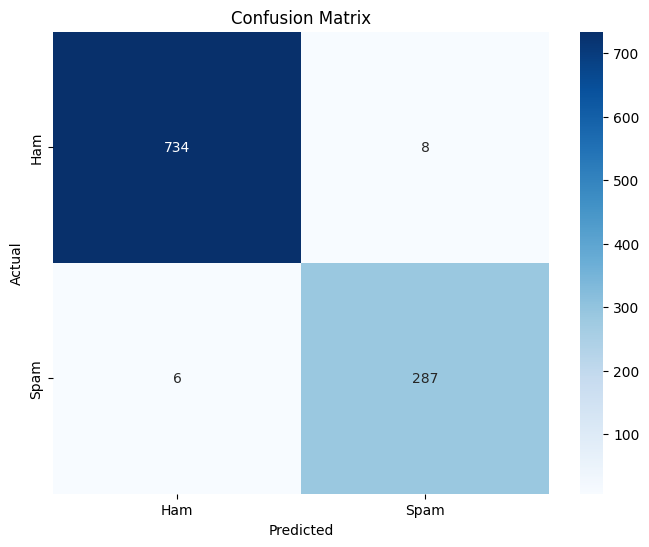

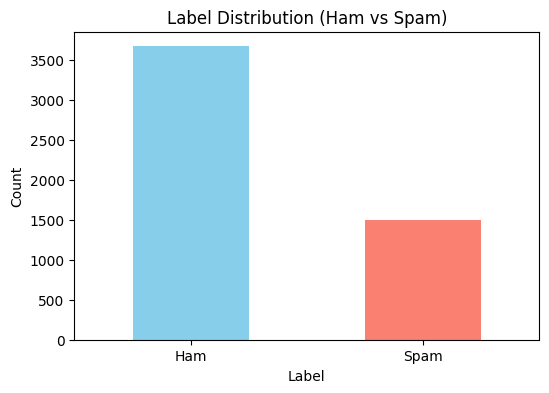

In [9]:
# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Label Distribution Bar Plot
plt.figure(figsize=(6, 4))
SH['label_num'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Label Distribution (Ham vs Spam)')
plt.xticks([0, 1], ['Ham', 'Spam'], rotation=0)
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

## 8. Results Interpretation

### Confusion Matrix Breakdown
- **True Negatives (TN):** 734 (Ham correctly predicted as Ham)
- **True Positives (TP):** 287 (Spam correctly predicted as Spam)
- **False Positives (FP):** 8 (Ham incorrectly predicted as Spam)
- **False Negatives (FN):** 6 (Spam incorrectly predicted as Ham)

### Key Metrics
- **Precision (Ham):** 0.99 – 99% of predicted Ham emails are correct.
- **Precision (Spam):** 0.97 – 97% of predicted Spam emails are correct.
- **F1-Score (Ham):** 0.99 – Strong balance of precision and recall.
- **F1-Score (Spam):** 0.98 – Excellent performance for spam detection.
- **Accuracy:** 98.65% – Overall, 99% of predictions are correct.

The model excels at distinguishing spam from ham, with minimal misclassifications.

## 9. Conclusion
This logistic regression model achieves **98.65% accuracy** in classifying emails as spam or ham, leveraging TF-IDF vectorization and a clean, efficient pipeline. It’s well-suited for real-world email filtering applications. Future improvements could include hyperparameter tuning (e.g., regularization) or experimenting with advanced models like SVM or neural networks.

Feel free to explore the code and adapt it for your needs! For questions, reach out via